# Лабораторная работа

## Эффект Комптона

## Теоретические сведения


Рассеяние $\gamma$-лучей в веществе относится к числу явлений, в которых особенно легко наблюдать двойственную природу излучения. Появление дополнительной длинноволновой компоненты при рассеянии $\gamma$-лучей объясняется, если считать, что $\gamma$-излучение представляет собой поток фотонов, имеющих энергию $\hbar\omega$ и импульс $p = \hbar\omega/c$. Эффект Комптона --- увеличение длины волны рассеянного излучения по сравнению с падающим --- интерпретируется как результат упругого соударения двух частиц: $\gamma$-кванта и свободного электрона. 
		
Пусть электрон до соударения покоился(его энергия равна энергии покоя равна $mc^2$), а $\gamma$-квант имел начальную энергию $\hbar\omega_0$. После соударения электрон приобретает энергию $\gamma mc^2$, где $\gamma = (1-\beta^2)^{-1/2}, \beta = v/c$, а $\gamma$-квант рассеивается на некоторый угол $\theta$ по отношению к первоначальному направлению движения. Энергия рассеянного излучения --- $\hbar\omega_1$. Запишем з.с.и. и з.с.э:
		$$
		\begin{cases}
			mc^2 + \hbar\omega_0 = \gamma mc^2 + \hbar\omega_1 \\
			\frac{\hbar\omega_0}{c} = \gamma mc\cos\theta + \frac{\hbar\omega_1}{c}\cos\theta \\
			\gamma mv\sin\varphi = \frac{\hbar\omega_1}{c}\sin\theta
		\end{cases}
		$$
Решая эти уравнения совместно и переходя от частот к длинам волн, получаем:
		\begin{equation}
		\Delta\lambda = \lambda_1-\lambda_0 = \frac{h}{mc}\left(1-\cos\theta\right) = \Lambda_k\left(1-\cos\theta\right)
		\end{equation}
		
Основной целью работы является проверка соотношения выше. Преобразуем эту формулу к энергии $\gamma$-квантов:
		\begin{equation}
			\frac{1}{\epsilon(\theta)} - \frac{1}{\epsilon_0} = 1 - \cos\theta
		\end{equation}

## Экспериментальная установка

![Схема экспериментальной установки](r.png)

## Ход работы

1\. Включили и настроили установку, проверили ее работоспособность

2\. Устанавливая сцинтилляционный счетчик под разными углами, снимаем амплитудные спектры и определяем положение фотопиков, записываем данные в таблицу.

In [1]:
theta = [0,10,20,30,40,50,60,70,80,90,100,110,120]
channel = [689,673,593,574,532,441,398,354,311,267,232,220,201]

3\. Строим график зависимости $1/N(\theta)$ от $1 - cos(\theta)$, по нему определяем энергию покоя частицы, на которой происходит комптоновское рассеяние первичных $\gamma$-квантов.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
theta = np.array(theta)
channel = np.array(channel)
x = [1 - np.cos(i/180*np.pi) for i in theta]
y = [1/i for i in channel]

In [22]:
a, b = np.polyfit(x,y,1)

In [19]:
s = 0
for i in range(len(y)):
    s+= (y[i] - (a*x[i]) - b)**2
s = (s/len(y))**0.5
err = s/y[-1]

0.016871451344690137


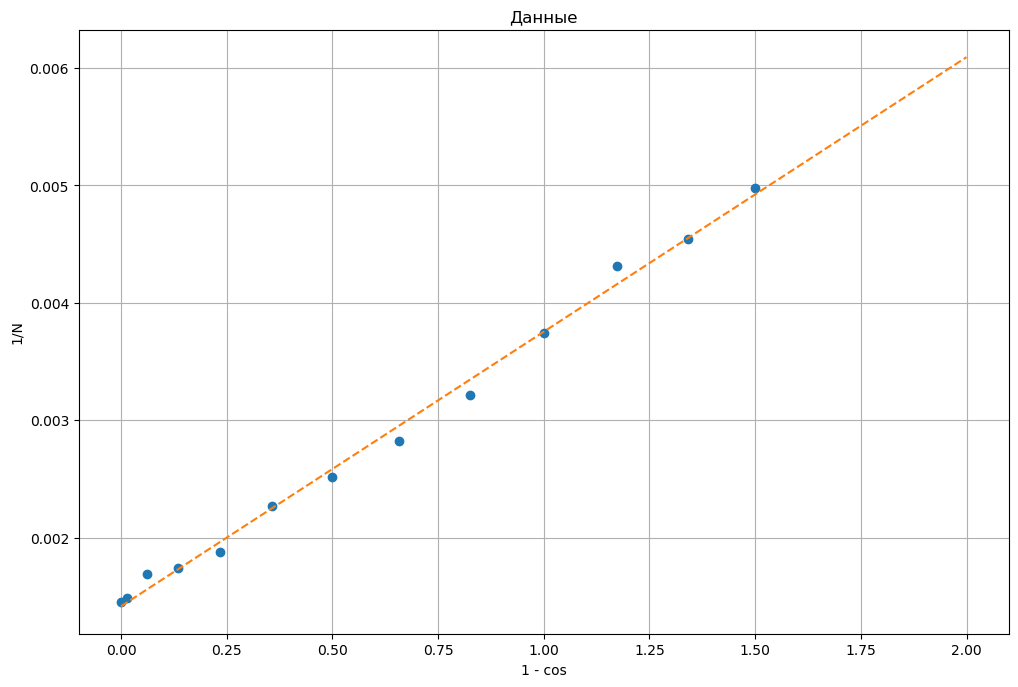

In [16]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x, y, 'o' ,label= "Всё")
ax1.grid(True)
ap = [i for i in range(0, 3, 1)]
p = [a*i + b for i in ap]
ax1.plot(ap, p, "--", label= "Аппроксимация")
plt.xlabel("1 - cos")
plt.ylabel("1/N")
plt.title("Данные")
plt.show()

$E_{r} = E_{\gamma} \frac{N(90)}{N(0)-N(90)}$

In [23]:
N0 = 1/b
N90 = 1/(a + b)
Eg = 0.662
E = Eg * N90/(N0 - N90)

In [28]:
print("Энергия покоя электрона:", round(E,3), "+-", round(E*err,3), "МеВ")

Энергия покоя электрона: 0.401 +- 0.007 МеВ


## Вывод

Исследовали энергетический спектр $\gamma$-квантов, рассеянных на графите. Определили энергию покоя частиц, на которых происходит комптоновское рассеяние